# PART 1: Import Required Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# PART 2: Load & Understand the Data

In [5]:
# Load CSV
df = pd.read_csv('data.csv')

# Preview first few rows
df.head(10)

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2
5,0,0,40,1,135290,0,0
6,1,1,49,2,179032,1,0
7,1,1,53,3,196851,1,2
8,0,0,40,1,131499,0,0
9,1,1,54,2,203573,1,0


In [6]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(df.dtypes)

The dataset has 2000 rows and 7 columns.

Missing values per column:
Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64

Data types of each column:
Gender             int64
Marital Status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement Size    int64
dtype: object


In [7]:
# Descriptive Statistics for All Columns
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Gender,2000.0,0.60,0.49,0.0,0.00,1.0,1.0,1.0
Marital Status,2000.0,0.50,0.50,0.0,0.00,1.0,1.0,1.0
Age,2000.0,40.82,9.46,20.0,33.00,40.0,48.0,76.0
Education,2000.0,1.46,0.78,0.0,1.00,1.0,2.0,3.0
Income,2000.0,137516.20,46184.30,35832.0,101262.75,133004.0,171232.5,309364.0
Occupation,2000.0,0.61,0.67,0.0,0.00,1.0,1.0,2.0
Settlement Size,2000.0,0.83,0.97,0.0,0.00,0.0,2.0,2.0


# PART 3: Data Cleaning & Preprocessing

In [10]:
# Keep a numeric version for technical analysis
df_numeric = df.copy()

# Then map labels on a separate copy for interpretation & visualisation
gender_map = {0: 'Male', 1: 'Female'}
marital_map = {0: 'Single', 1: 'Married'}
education_map = {
    0: 'Other/Unknown',
    1: 'High School',
    2: 'University',
    3: 'Graduate School'
}
occupation_map = {
    0: 'Unemployed/Unskilled',
    1: 'Skilled Employee/Official',
    2: 'Self-employed/Qualified/Management'
}
settlement_map = {
    0: 'Small City',
    1: 'Mid-sized City',
    2: 'Big City'
}

# Apply mappings to df (not df_numeric)
df['Gender'] = df['Gender'].map(gender_map).fillna('Unknown')
df['Marital Status'] = df['Marital Status'].map(marital_map).fillna('Unknown')
df['Education'] = df['Education'].map(education_map).fillna('Unknown')
df['Occupation'] = df['Occupation'].map(occupation_map).fillna('Unknown')
df['Settlement Size'] = df['Settlement Size'].map(settlement_map).fillna('Unknown')

# PART 4: Exploratory Data Analysis (EDA)

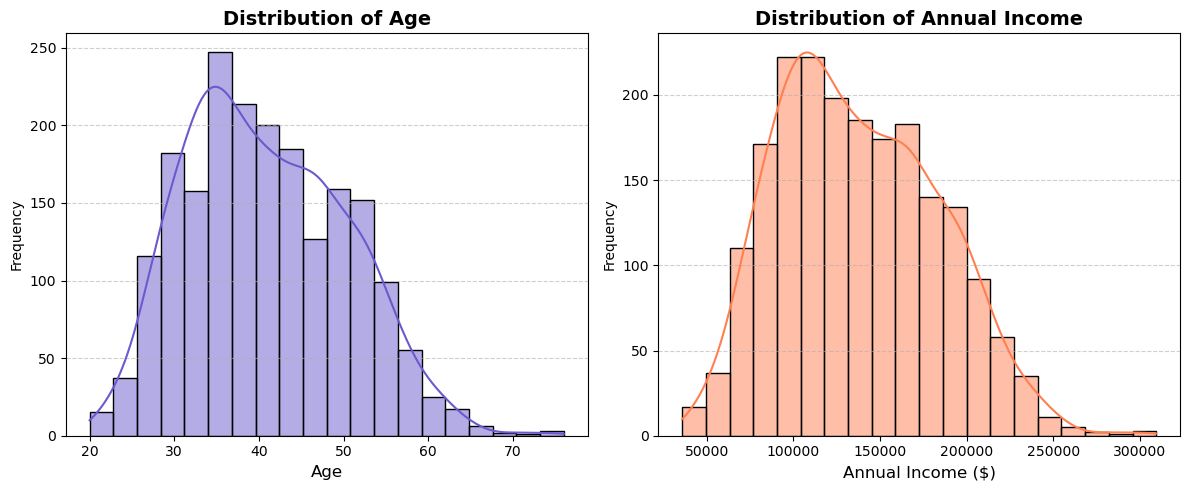

In [12]:
# Plot histograms for Age and Income
plt.figure(figsize=(12, 5))

# Custom colour palette
age_colour = "#6A5ACD"      # Slate Blue
income_colour = "#FF7F50"   # Coral

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color=age_colour, edgecolor='black')
plt.title('Distribution of Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Histogram for Income
plt.subplot(1, 2, 2)
sns.histplot(df['Income'], kde=True, bins=20, color=income_colour, edgecolor='black')
plt.title('Distribution of Annual Income', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

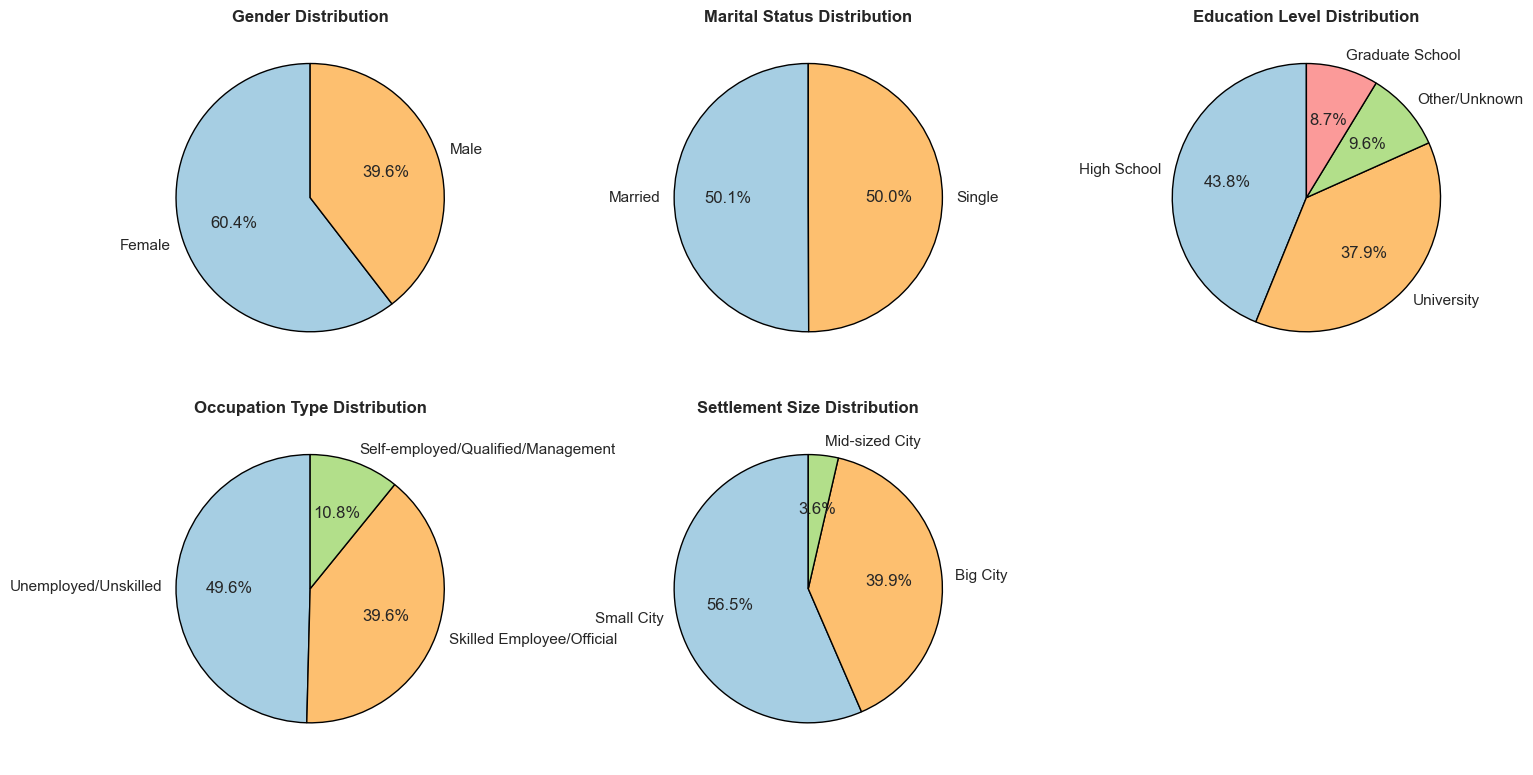

In [140]:
# Define variables and labels
cat_vars = {
    "Gender": "Gender Distribution",
    "Marital Status": "Marital Status Distribution",
    "Education": "Education Level Distribution",
    "Occupation": "Occupation Type Distribution",
    "Settlement Size": "Settlement Size Distribution"
}

# Color palette
colors = ['#A6CEE3', '#FDBF6F', '#B2DF8A', '#FB9A99', '#CAB2D6']

# Set up grid
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, (col, title) in enumerate(cat_vars.items()):
    counts = df[col].value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(title, fontsize=12, fontweight='bold')

for j in range(len(cat_vars), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

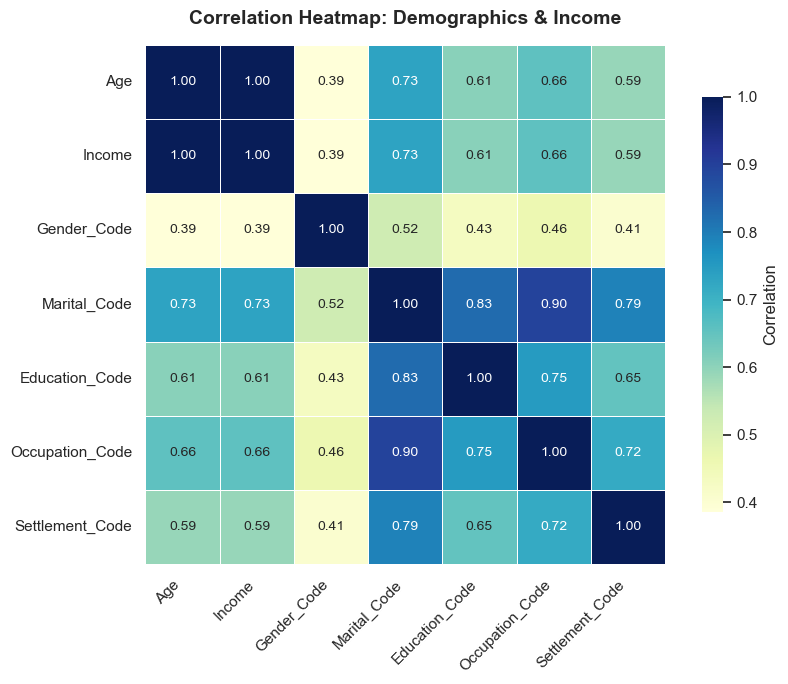

In [142]:
# Compute correlation matrix
correlation = df_encoded[[
    "Age", "Income", 
    "Gender_Code", "Marital_Code", 
    "Education_Code", "Occupation_Code", "Settlement_Code"
]].corr()

# Set up the plot style
plt.figure(figsize=(9, 7))
sns.set(font_scale=1)  # Adjust font scale
sns.set_style("whitegrid")  # Optional: cleaner background

# Draw the heatmap
heatmap = sns.heatmap(
    correlation, 
    annot=True,
    fmt=".2f", 
    cmap='YlGnBu',  # Softer gradient than 'coolwarm'
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
    square=True,
    annot_kws={"size": 10}
)

# Format title and layout
plt.title("Correlation Heatmap: Demographics & Income", fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

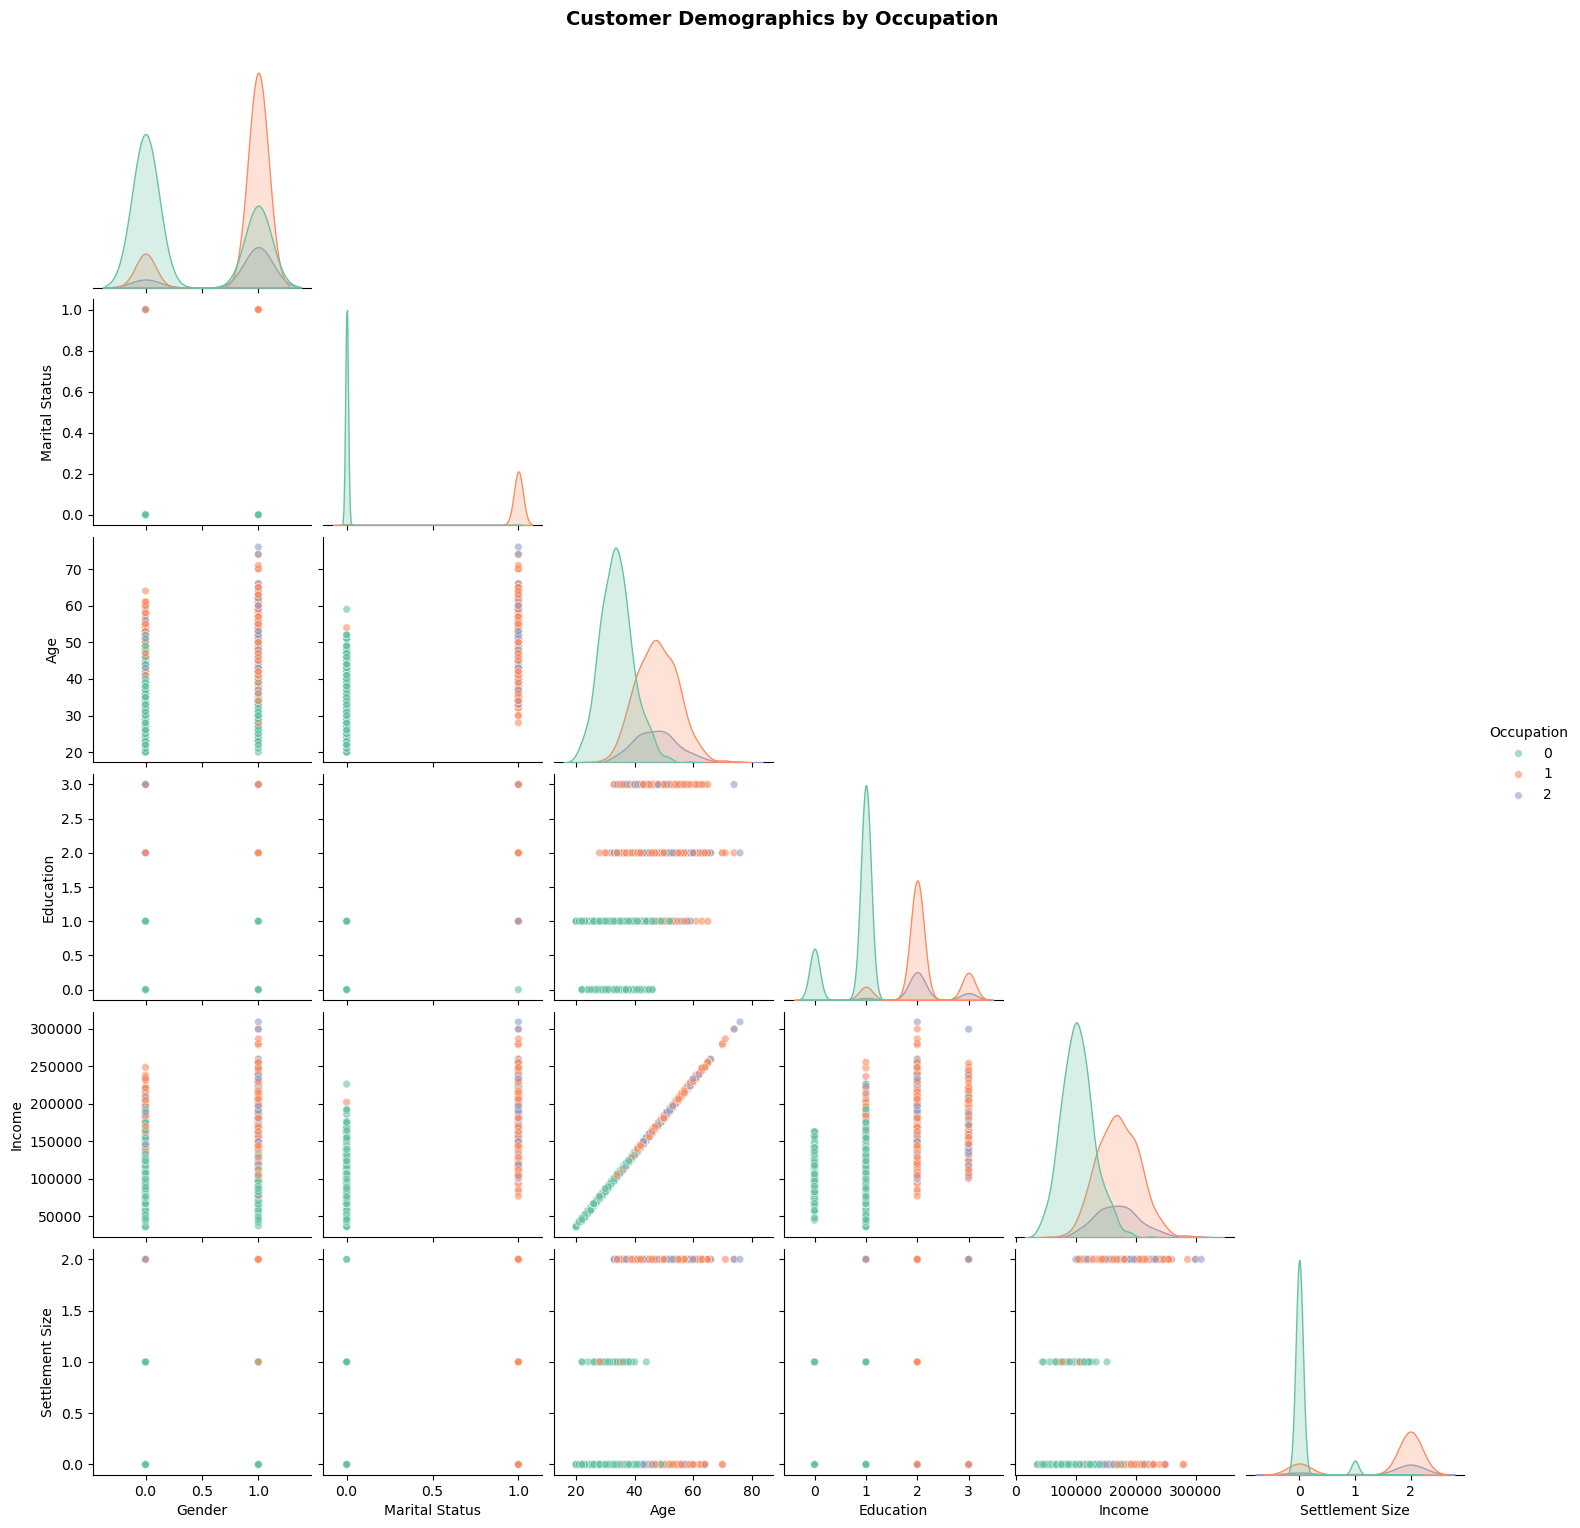

In [73]:
# Pair Plot of Customer Demographics by Occupation
sns.pairplot(
    df_numeric,
    hue='Occupation',
    diag_kind='kde',
    corner=True,
    plot_kws={"alpha": 0.6, "s": 30},
    palette='Set2'
)
plt.suptitle("Customer Demographics by Occupation", y=1.02, fontsize=14, fontweight='bold')
plt.show()

# PART 5: Data Standardisation Before Clustering

In [86]:
# Standardise Age and Income using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["Age", "Income"]])

# PART 6: Determining Optimal k

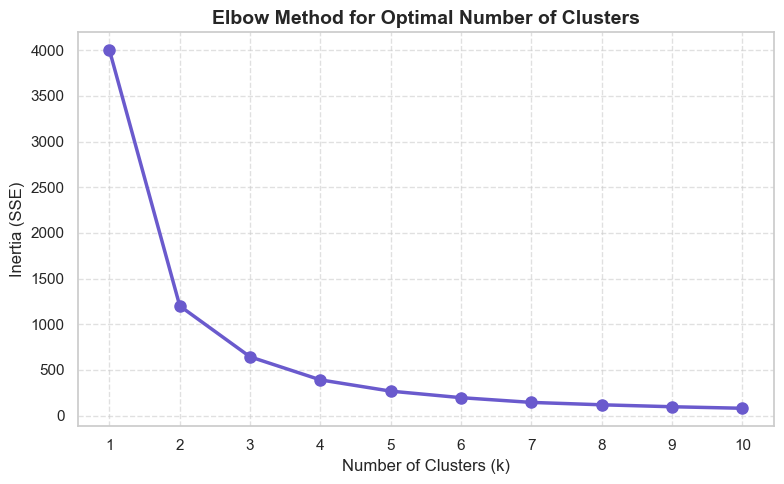

In [93]:
# Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-', color='#6A5ACD', linewidth=2.5, markersize=8)
plt.xticks(K)
plt.title("Elbow Method for Optimal Number of Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia (SSE)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

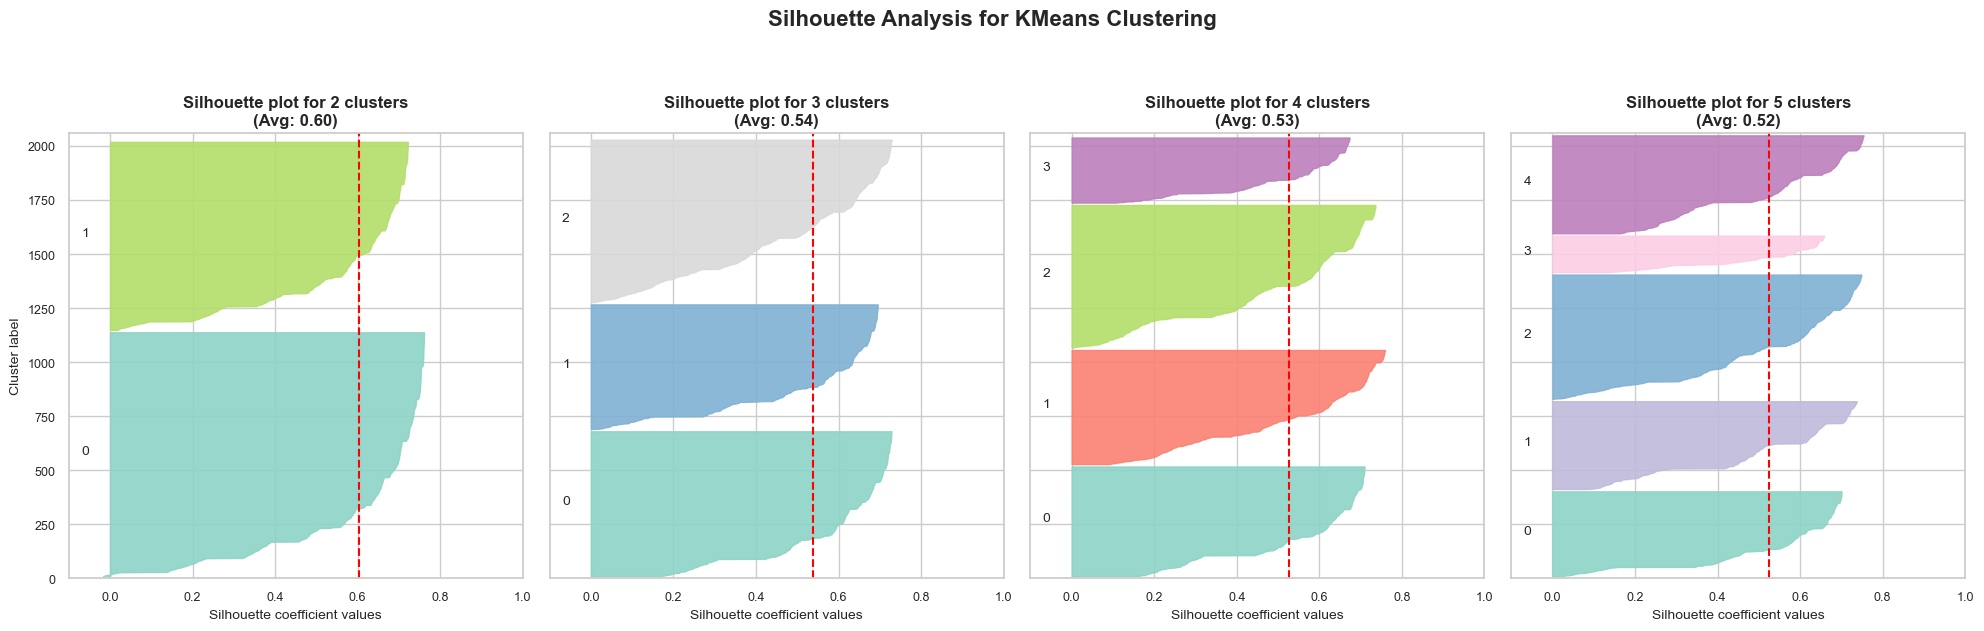

In [106]:
cluster_range = [2, 3, 4, 5]

# Create figure with dynamic subplot count
fig, axs = plt.subplots(1, len(cluster_range), figsize=(5 * len(cluster_range), 6), sharey=True)
plt.subplots_adjust(wspace=0.3)

for idx, n_clusters in enumerate(cluster_range):
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    # Silhouette scores
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    y_lower = 10
    axs[idx].set_xlim([-0.1, 1])
    axs[idx].set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    for i in range(n_clusters):
        ith_cluster_silhouette = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette.sort()
        size = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size

        # Use pastel Set3 palette
        color = cm.get_cmap('Set3')(i / n_clusters)
        axs[idx].fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_silhouette,
                               facecolor=color, edgecolor=color, alpha=0.9)
        axs[idx].text(-0.07, y_lower + 0.5 * size, str(i), fontsize=10)
        y_lower = y_upper + 10

    axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=1.5)
    axs[idx].set_title(f"Silhouette plot for {n_clusters} clusters\n(Avg: {silhouette_avg:.2f})", fontsize=12, fontweight='bold')
    axs[idx].set_xlabel("Silhouette coefficient values", fontsize=10)
    if idx == 0:
        axs[idx].set_ylabel("Cluster label", fontsize=10)
    axs[idx].tick_params(axis='both', which='major', labelsize=9)

plt.suptitle("Silhouette Analysis for KMeans Clustering", fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# PART 7: Customer Segmentation (K = 3)

In [126]:
# Create clustering DataFrame from scaled Age & Income
cluster_df = pd.DataFrame(scaled_data, columns=["Age_scaled", "Income_scaled"])

# KMeans++
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_df["KMeans_Label"] = kmeans.fit_predict(scaled_data)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_df["Agglomerative_Label"] = agg.fit_predict(scaled_data)

# Merge cluster labels back into main DataFrame
df['KMeans_Cluster'] = cluster_df['KMeans_Label']
df['Agglo_Cluster'] = cluster_df['Agglomerative_Label']

In [128]:
kmeans_summary = df.groupby('KMeans_Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Gender': lambda x: x.mode()[0],
    'Marital Status': lambda x: x.mode()[0],
    'Education': lambda x: x.mode()[0],
    'Occupation': lambda x: x.mode()[0],
    'Settlement Size': lambda x: x.mode()[0],
    'KMeans_Cluster': 'count'
}).rename(columns={'KMeans_Cluster': 'Count'}).reset_index()

In [130]:
agglo_summary = df.groupby('Agglo_Cluster').agg({
    'Age': 'mean',
    'Income': 'mean',
    'Gender': lambda x: x.mode()[0],
    'Marital Status': lambda x: x.mode()[0],
    'Education': lambda x: x.mode()[0],
    'Occupation': lambda x: x.mode()[0],
    'Settlement Size': lambda x: x.mode()[0],
    'Agglo_Cluster': 'count'
}).rename(columns={'Agglo_Cluster': 'Count'}).reset_index()

In [132]:
print("KMeans++ Cluster Summary")
display(kmeans_summary)

print("\nAgglomerative Clustering Summary")
display(agglo_summary)

KMeans++ Cluster Summary


,KMeans_Cluster,Age,Income,Gender,Marital Status,Education,Occupation,Settlement Size,Count
0,0,30.716841,88189.256334,Male,Single,High School,Unemployed/Unskilled,Small City,671
1,1,52.708839,195566.239168,Female,Married,University,Skilled Employee/Official,Big City,577
2,2,40.722074,136988.938830,Female,Married,University,Unemployed/Unskilled,Small City,752



Agglomerative Clustering Summary


,Agglo_Cluster,Age,Income,Gender,Marital Status,Education,Occupation,Settlement Size,Count
0,0,32.76161,98148.369453,Male,Single,High School,Unemployed/Unskilled,Small City,969
1,1,54.74505,205592.009901,Female,Married,University,Skilled Employee/Official,Big City,404
2,2,44.31260,154493.542265,Female,Married,University,Skilled Employee/Official,Big City,627


In [138]:
# Cross-tab comparison of cluster labels
pd.crosstab(df['KMeans_Cluster'], df['Agglo_Cluster'], margins=False)

Agglo_Cluster,0,1,2
KMeans_Cluster,,,
0,671,0,0
1,0,404,173
2,298,0,454


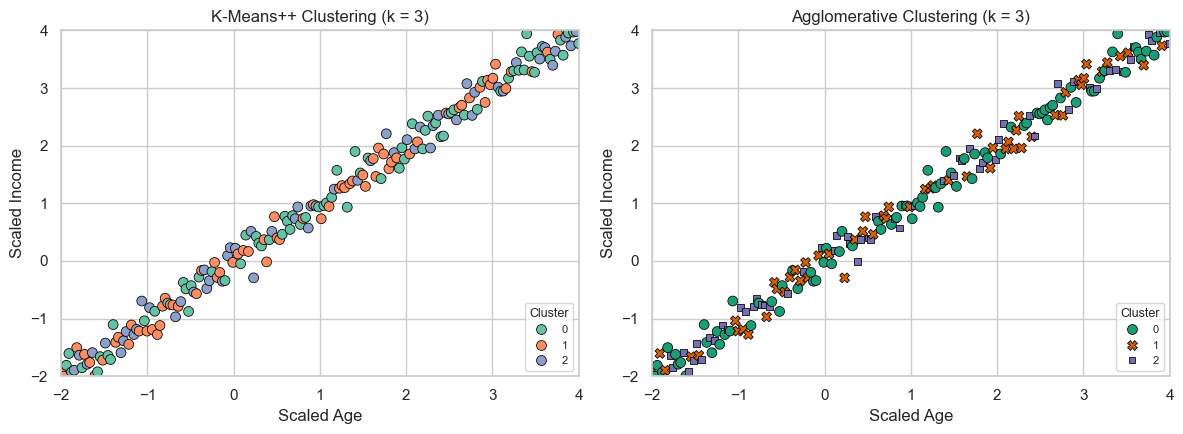

In [152]:
plt.figure(figsize=(12, 4.5))

# --- K-Means++ Clustering ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=cluster_df, x="Age_scaled", y="Income_scaled",
    hue="KMeans_Label", palette="Set2", s=50, edgecolor='black', marker='o'
)
plt.title("K-Means++ Clustering (k = 3)", fontsize=12)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.legend(title="Cluster", loc='lower right', fontsize=8, title_fontsize=9)
plt.ylim(-2, 4)  # Optional: adjust to fit tighter view
plt.xlim(-2, 4)

# --- Agglomerative Clustering ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=cluster_df, x="Age_scaled", y="Income_scaled",
    hue="Agglomerative_Label", 
    style="Agglomerative_Label",  # Different markers
    palette="Dark2", s=50, edgecolor='black'
)
plt.title("Agglomerative Clustering (k = 3)", fontsize=12)
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.legend(title="Cluster", loc='lower right', fontsize=8, title_fontsize=9)
plt.ylim(-2, 4)
plt.xlim(-2, 4)

plt.tight_layout()
plt.show()